In [7]:
# Step 1: We import necessary classes

from standard_hom_count import GraphHomomorphismCounter

In [4]:
# Step 2: We define some common graphs for demo

square = graphs.CycleGraph(4)

bip = graphs.CompleteBipartiteGraph(2, 4)

petersen = graphs.PetersenGraph()

In [5]:
# Example 1: We want to count the number of homomorphisms from the square (4-cycle) to the graph bip

counter = GraphHomomorphismCounter(square, bip)
count = counter.count_homomorphisms()
print(count)

128


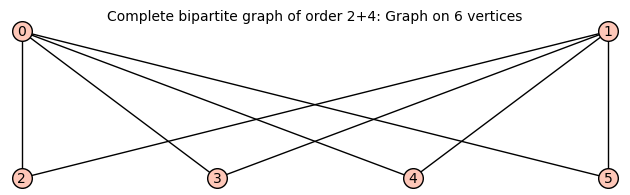

In [10]:
bip

In [6]:
# Example 2: Similarily, we can count the number of homomorphisms from three_grid to the Petersen graph

second_counter = GraphHomomorphismCounter(three_grid, petersen)
second_count = second_counter.count_homomorphisms()
print(second_count)

6570


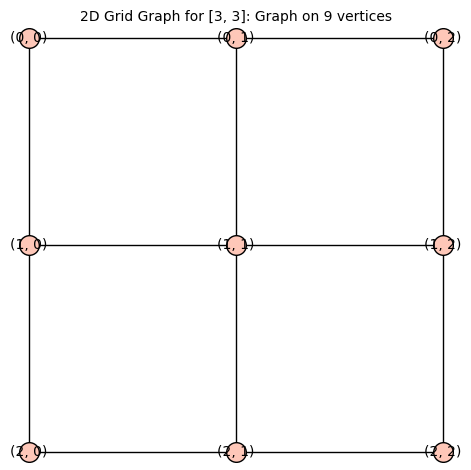

In [12]:
three_grid

In [9]:
# Example 3: We can also use the `%timeit` magic to benchmark the counting algorithm

random_graph = graphs.RandomGNP(20, 0.5, seed=42)

third_counter = GraphHomomorphismCounter(three_grid, random_graph)
%timeit -r 5 third_counter.count_homomorphisms()

2.73 s ± 204 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [23]:
# The library comes with reasonable settings: For instance, if the target graph is dense,
# it would intelligently choose the adjacency matrix to represent the target graph.
# Of course, you can modify `density_threshold` argument to your scenario:

den_counter = GraphHomomorphismCounter(three_grid, random_graph, density_threshold=0) # force adjacency matrix
den_counter.count_homomorphisms()

70146644

In [24]:
den_counter = GraphHomomorphismCounter(three_grid, random_graph, density_threshold=2) # force adjacency list
den_counter.count_homomorphisms()

70146644

In [ ]:
# In addition to count ordinary homomorphisms, this library also allows you to count colourful
# homomorphisms, i.e., colour-perserving graph homomorphisms.

In [22]:
square = graphs.Grid2dGraph(2, 2)
square.relabel()
square_clr = [0, 1, 1, 0]

three_grid = graphs.Grid2dGraph(3, 3)
three_grid.relabel()
three_grid_clr = [0, 1, 0, 1, 0, 1, 0, 1, 0]

colourful_counter = GraphHomomorphismCounter(square, three_grid, graph_clr=square_clr, target_clr=three_grid_clr, colourful=true)
colourful_counter.count_homomorphisms()

72

![logo](images/four-cycle-and-three-grid.png)

In [25]:
# For most cases, the standard homomorphism counter should work for you. However, if you wish to
# go above and beyond, you can also try to use the concurrent homomorphism counter.

In [27]:
from concurrent_hom_count import ConcurrentGraphHomomorphismCounter